### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

### Preprocess Data

In [2]:
data_ori = pd.read_csv('customer-personality.csv')

In [3]:
# drop missing rows
data_clean = data_ori.dropna()

# drop outliers
data_clean = data_clean[~(data_clean['Income'] >= 200000)]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   i

In [4]:
# complete RFM metrics
data_clean['Frequency'] = data_clean.iloc[:, 15:19].sum(axis=1) #FIXME
data_clean['Monetary'] = data_clean.iloc[:, 9:15].sum(axis=1)

In [5]:
data_clean.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [6]:
data_clean.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Frequency,Monetary
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5586.618059,1968.816704,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,2.322799,4.085779,2.671783,5.802257,5.318736,14.882619,607.321445
std,3249.082838,11.987000,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,1.923820,2.741473,2.927179,3.250974,2.425863,7.672246,602.925291
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2814.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,8.000000,69.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,15.000000,397.000000
75%,8419.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,21.000000,1048.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,44.000000,2525.000000


/Users/tiresias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tiresias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tiresias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

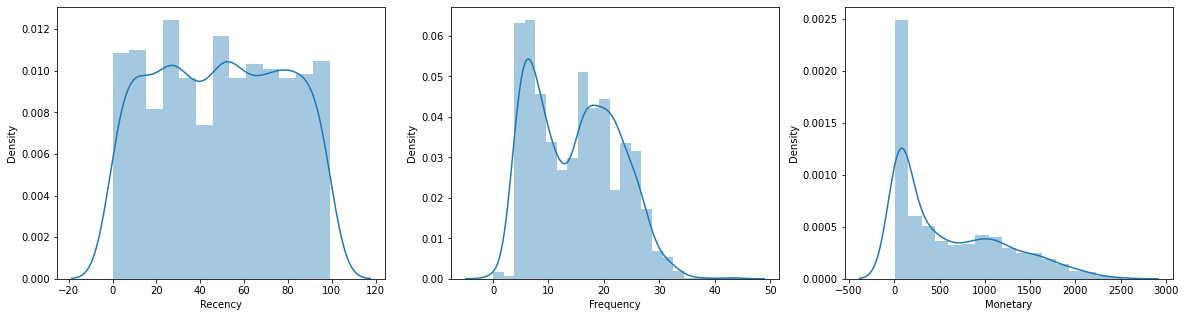

In [7]:
# plot distribution of RFM metrics
rfm_metrics = ['Recency', 'Frequency', 'Monetary']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, feature in enumerate(rfm_metrics):
    sns.distplot(data_clean[feature], ax=axes[i])

<AxesSubplot:>

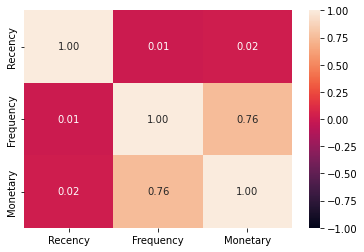

In [8]:
# heatmap with scale from -1 to 1
sns.heatmap(data_clean[rfm_metrics].corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)

### Raw RFM + KMeans 

In [9]:
# scale RFM metrics
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(data_clean[rfm_metrics])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm_metrics)
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,2215.000000,2215.000000,2215.000000
mean,0.495196,0.338241,0.239016
std,0.292420,0.174369,0.239256
min,0.000000,0.000000,0.000000
25%,0.242424,0.181818,0.025397
50%,0.494949,0.340909,0.155556
75%,0.747475,0.477273,0.413889
max,1.000000,1.000000,1.000000


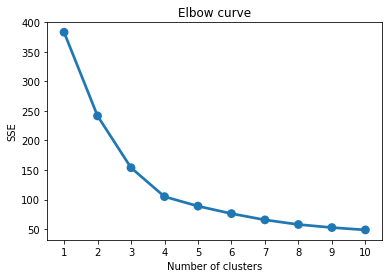

In [10]:
# Raw RFM Scaled + KMeans
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(rfm_scaled)
    SSE.append(kmeans.inertia_)

sns.pointplot(x=list(range(1, 11)), y=SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow curve')
plt.show()

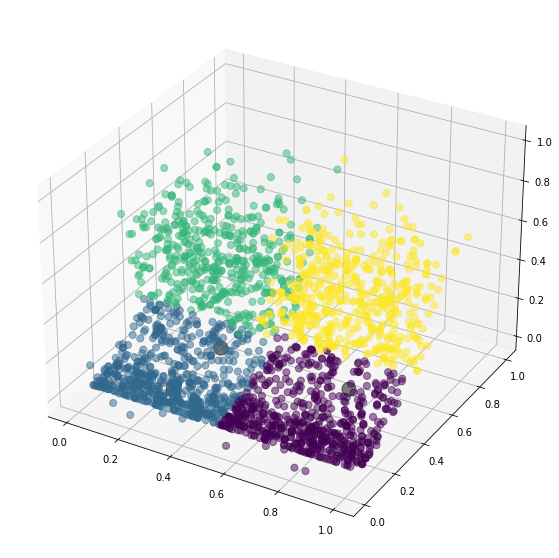

In [11]:
# visualize clusters with RFM metrics in 3D
model = KMeans(n_clusters=4, random_state=0).fit(rfm_scaled)
centers = model.cluster_centers_
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_scaled['Recency'], rfm_scaled['Frequency'], rfm_scaled['Monetary'], c=model.predict(rfm_scaled), s=50, alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

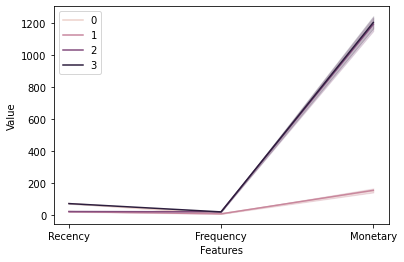

In [12]:
# visualize clusters with RFM metrics with lineplot
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_scaled))
rfm_.columns = rfm_metrics
rfm_['ID'] = data_clean['ID']
rfm_['Cluster'] = model.labels_

melted_rfm_scaled = pd.melt(rfm_, id_vars=['ID', 'Cluster'], value_vars=rfm_metrics, var_name='Features', value_name='Value')
sns.lineplot(x='Features', y='Value', hue='Cluster', data=melted_rfm_scaled)
plt.legend()

In [13]:
melted_rfm_scaled

,ID,Cluster,Features,Value
0,5524.0,3,Recency,58.0
1,2174.0,1,Recency,38.0
2,4141.0,2,Recency,26.0
3,6182.0,1,Recency,26.0
4,5324.0,0,Recency,94.0
...,...,...,...,...
6640,607.0,2,Monetary,1341.0
6641,10469.0,3,Monetary,444.0
6642,6983.0,3,Monetary,1241.0
6643,3661.0,2,Monetary,843.0


Raw RFM not appropriate for clustering despite MinMaxScaler

### RFM Score + KMeans

In [124]:
# create RFM score columns
rfm_df = pd.DataFrame(data_clean[rfm_metrics])
rfm_df.set_index(data_clean['ID'], inplace=True)

s1 = np.full((1, rfm_df.shape[0] - int(0.8 * rfm_df.shape[0])), 1)
s2 = np.full((1, int(0.2 * rfm_df.shape[0])), 2)
s3 = np.full((1, int(0.2 * rfm_df.shape[0])), 3)
s4 = np.full((1, int(0.2 * rfm_df.shape[0])), 4)
s5 = np.full((1, int(0.2 * rfm_df.shape[0])), 5)
score = np.hstack((s1, s2, s3, s4, s5)).flatten()

rfm_df = rfm_df.sort_values(by=['Recency'], ascending=False)
rfm_df['r_score'] = score

for i, j in zip(('Frequency', 'Monetary'), ('f_score', 'm_score')):
    rfm_df = rfm_df.sort_values(by=i)
    rfm_df[j] = score

rfm_df

,Recency,Frequency,Monetary,r_score,f_score,m_score
ID,,,,,,
11110,56,0,5,3,1,1
3955,20,0,6,4,1,1
5555,81,0,6,1,1,1
11181,85,0,8,1,1,1
6862,65,15,8,2,3,1
...,...,...,...,...,...,...
4475,82,25,2440,1,5,5
4580,46,26,2486,3,5,5
1763,62,29,2524,2,5,5


<AxesSubplot:>

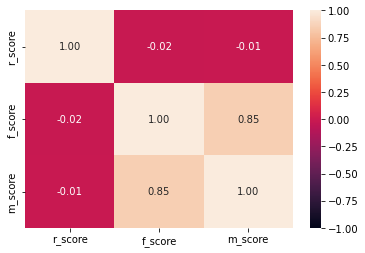

In [125]:
# heatmap of correlation between RFM metrics
sns.heatmap(rfm_df.iloc[:, 3:6].corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)

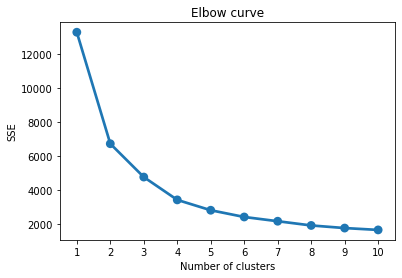

In [126]:
# RFM Scores + KMeans
seed = 0

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=seed).fit(rfm_df.iloc[:, 3:])
    SSE.append(kmeans.inertia_)

sns.pointplot(x=list(range(1, 11)), y=SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow curve')
plt.show()

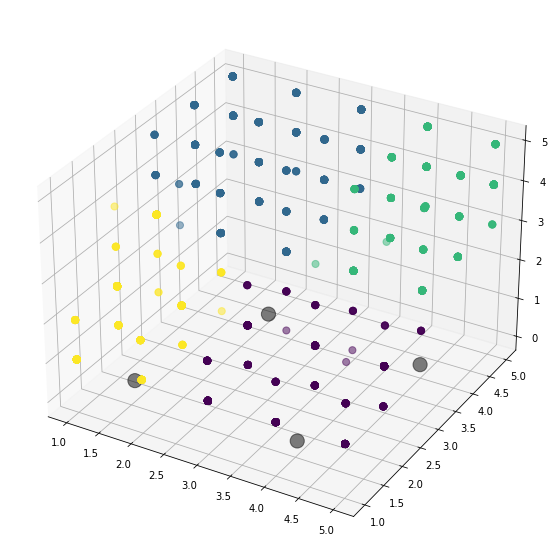

In [127]:
# visualize clusters with RFM scores in 3D
model = KMeans(n_clusters=4, random_state=seed).fit(rfm_df.iloc[:, 3:])
centers = model.cluster_centers_
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df.iloc[:, 3], rfm_df.iloc[:, 4], rfm_df.iloc[:, 5], c=model.predict(rfm_df.iloc[:, 3:]), s=50, alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

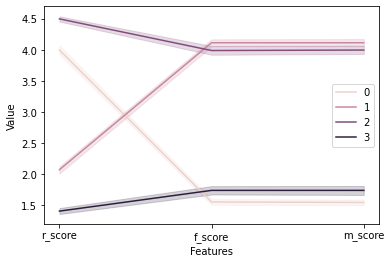

In [128]:
# visualize clusters with RFM scores with lineplot
rfm_df['Cluster'] = model.labels_

melted_rfm = pd.melt(rfm_df.reset_index(), id_vars=['ID', 'Cluster'], value_vars=['r_score', 'f_score', 'm_score'], var_name='Features', value_name='Value')
sns.lineplot(x='Features', y='Value', hue='Cluster', data=melted_rfm)
plt.legend()

Customer Segments
- (New Customer) Cluster 0 = recent, low purchases and low spending
- (Risk of Churn) Cluster 1 = not recent, high purchases and high spending
- (Best Customer) Cluster 2 = recent, high purchases and high spending
- (Lost Customer) Cluster 3 = not recent, low purchases and high spending

In [130]:
# Summary of Raw RFM by Clusters
rfm_df.groupby('Cluster').agg({'Recency': ['mean', 'min', 'max'], 'Frequency': ['mean', 'min', 'max'], 'Monetary': ['mean', 'min', 'max', 'count']})

Recency          Frequency             Monetary                 
              mean min max       mean min max         mean  min   max count
Cluster                                                                    
0        29.062500   0  58   7.091071   0  15    73.051786    5   373   560
1        67.659836  39  99  20.751366  10  43  1040.971311  198  2524   732
2        18.790291   0  39  20.337864  10  44   966.460194  213  2525   515
3        81.151961  59  99   8.161765   0  17   109.289216    6   801   408